# Imports

In [1]:
import sys
import os
import logging
import gymnasium as gym

sys.path.append("../..")

import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
import cyberbattle.agents.baseline.agent_tabularqlearning as tqa
import cyberbattle.agents.baseline.agent_dql as dqla
from cyberbattle.agents.baseline.agent_wrapper import Verbosity
from cyberbattle._env.cyberbattle_env import CyberBattleEnv

logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")
%matplotlib inline

# Environment Definitions

In [2]:
# Parameter - Chain
#gymid = "CyberBattleChain-v0"
#env_size = 10
#iteration_count = 6000
#training_episode_count = 25
#eval_episode_count = 5
#maximum_node_count = 22
#maximum_total_credentials = 22


# Parameters - ToyCTF
gymid = "CyberBattleToyCtf-v0"
env_size = None
#iteration_count = 750
iteration_count = 200
#training_episode_count = 10
training_episode_count = 3
#eval_episode_count = 10
eval_episode_count = 3
maximum_node_count = 12
maximum_total_credentials = 10


# Load the Gym environment
if env_size:
    _gym_env = gym.make(gymid, size=env_size)
else:
    _gym_env = gym.make(gymid)

from typing import cast

gym_env = cast(CyberBattleEnv, _gym_env.unwrapped)
assert isinstance(gym_env, CyberBattleEnv), f"Expected CyberBattleEnv, got {type(gym_env)}"

ep = w.EnvironmentBounds.of_identifiers(maximum_node_count=maximum_node_count, maximum_total_credentials=maximum_total_credentials, identifiers=gym_env.identifiers)

# Credential Cache

In [ ]:
# Evaluate a random agent that opportunistically exploits
# credentials gathere in its local cache
credlookup_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=rca.CredentialCacheExploiter(),
    episode_count=10,
    iteration_count=iteration_count,
    epsilon=0.90,
    render=False,
    epsilon_exponential_decay=10000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    title="Credential lookups (ϵ-greedy)",
)

# Deep Q-Learning

In [3]:
# Evaluate the Deep Q-learning agent
dql_run = learner.epsilon_greedy_search(
    cyberbattle_gym_env=gym_env,
    environment_properties=ep,
    learner=dqla.DeepQLearnerPolicy(
        ep=ep,
        gamma=0.015,
        replay_memory_size=10000,
        target_update=10,
        batch_size=512,
        # torch default learning rate is 1e-2
        # a large value helps converge in less episodes
        learning_rate=0.01,
    ),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="DQL",
)

###### DQL
Learning with: episode_count=3,iteration_count=200,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=5000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/3 'DQL' ϵ=0.9000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 17|reward:  131.0|last_reward_at:   17|Elapsed Time: 0:00:00||/home/minu/CyberBattleSim/cyberbattle/_env/../../cyberbattle/agents/baseline/agent_dql.py:408: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  state_batch = torch.tensor(states_to_consider).to(device)
Episode 1|Iteration 200|reward:  192.0|last_reward_at:  166|Elapsed Time: 0:00:05||


  Episode 1 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/30 (0.06)
    explore-remote: 6/67 (0.08)
    explore-connect: 1/72 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/22 (0.00)
  exploit deflected to exploration: 1
  ## Episode: 2/3 'DQL' ϵ=0.8688, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 200|reward:  172.0|last_reward_at:  196|Elapsed Time: 0:00:03||


  Episode 2 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/18 (0.05)
    explore-remote: 5/89 (0.05)
    explore-connect: 2/78 (0.03)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/7 (0.00)
  exploit deflected to exploration: 20
  ## Episode: 3/3 'DQL' ϵ=0.8386, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 200|reward:  212.0|last_reward_at:  170|Elapsed Time: 0:00:07||


  Episode 3 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/31 (0.06)
    explore-remote: 8/79 (0.09)
    explore-connect: 1/50 (0.02)
    exploit-local: 0/1 (0.00)
    exploit-remote: 0/18 (0.00)
    exploit-connect: 0/10 (0.00)
  exploit deflected to exploration: 3
simulation ended


# Random Search

In [4]:
# Evaluate the random agent
random_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=learner.RandomPolicy(),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=1.0,  # purely random
    render=False,
    verbosity=Verbosity.Quiet,
    plot_episodes_length=False,
    title="Random search",
)

###### Random search
Learning with: episode_count=3,iteration_count=200,ϵ=1.0,ϵ_min=0.0, 
  ## Episode: 1/3 'Random search' ϵ=1.0000, 


Episode 1|Iteration 200|reward:  148.0|last_reward_at:  179|Elapsed Time: 0:00:00||


  Episode 1 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/22 (0.04)
    explore-remote: 8/89 (0.08)
    explore-connect: 1/79 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/3 'Random search' ϵ=1.0000, 


Episode 2|Iteration 200|reward:  315.0|last_reward_at:  166|Elapsed Time: 0:00:00||


  Episode 2 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/29 (0.09)
    explore-remote: 7/91 (0.07)
    explore-connect: 2/68 (0.03)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/3 'Random search' ϵ=1.0000, 


Episode 3|Iteration 200|reward:   81.0|last_reward_at:  164|Elapsed Time: 0:00:00||


  Episode 3 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/28 (0.03)
    explore-remote: 6/85 (0.07)
    explore-connect: 0/80 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


# Tabular Q-Learning

In [5]:
# Evaluate a Tabular Q-learning agent
tabularq_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=tqa.QTabularLearner(ep, gamma=0.015, learning_rate=0.01, exploit_percentile=100),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.01,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="Tabular Q-learning",
)

###### Tabular Q-learning
Learning with: episode_count=3,iteration_count=200,ϵ=0.9,ϵ_min=0.01, ϵ_expdecay=5000,γ=0.015,learning_rate=0.01,Q%=100
  ## Episode: 1/3 'Tabular Q-learning' ϵ=0.9000, γ=0.015,learning_rate=0.01,Q%=100


Episode 1|Iteration 200|reward:  103.0|last_reward_at:  104|Elapsed Time: 0:00:01||


  Episode 1 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/21 (0.05)
    explore-remote: 4/86 (0.04)
    explore-connect: 0/75 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/12 (0.00)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 8
  ## Episode: 2/3 'Tabular Q-learning' ϵ=0.8653, γ=0.015,learning_rate=0.01,Q%=100


Episode 2|Iteration 200|reward:  117.0|last_reward_at:   67|Elapsed Time: 0:00:03||


  Episode 2 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/24 (0.04)
    explore-remote: 2/65 (0.03)
    explore-connect: 0/69 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 3/2 (0.60)
    exploit-connect: 1/33 (0.03)
  exploit deflected to exploration: 1
  ## Episode: 3/3 'Tabular Q-learning' ϵ=0.8317, γ=0.015,learning_rate=0.01,Q%=100


Episode 3|Iteration 200|reward:  295.0|last_reward_at:  200|Elapsed Time: 0:00:02||


  Episode 3 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/18 (0.10)
    explore-remote: 3/67 (0.04)
    explore-connect: 1/77 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 3/4 (0.43)
    exploit-connect: 2/23 (0.08)
  exploit deflected to exploration: 7
simulation ended


# Evaluation

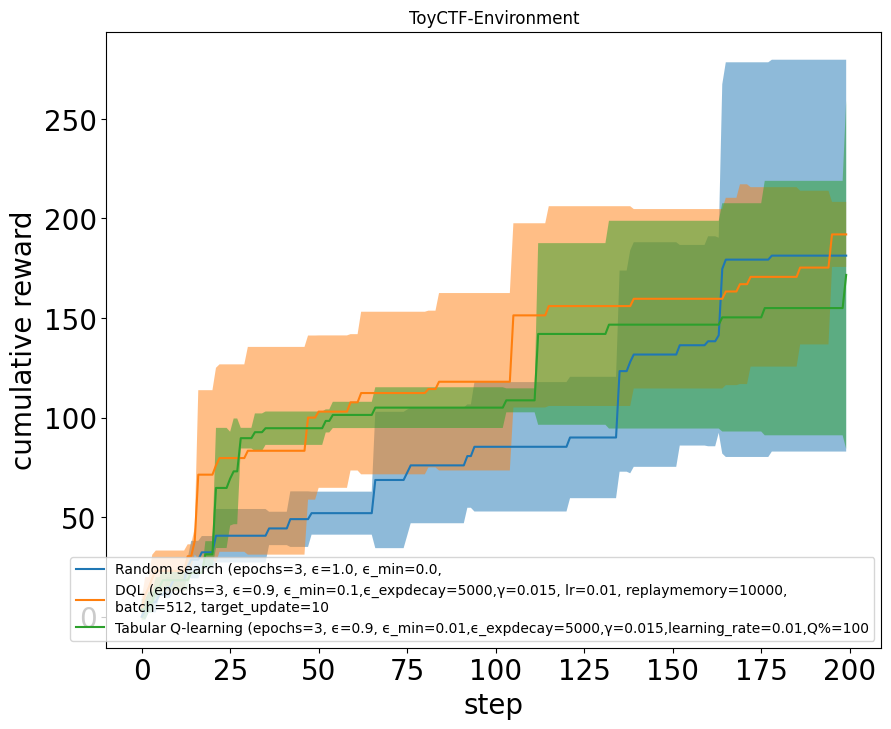

In [6]:
# Compare and plot results for all the agents
#all_runs = [random_run, credlookup_run, tabularq_run, tabularq_exploit_run, dql_run, dql_exploit_run]
all_runs = [random_run, dql_run,tabularq_run]
# Plot averaged cumulative rewards for DQL vs Random vs DQL-Exploit
themodel = dqla.CyberBattleStateActionModel(ep)
p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=f"ToyCTF-Environment"
)

In [ ]:
# Plot cumulative rewards for all episodes
for r in all_runs:
    p.plot_all_episodes(r)